#**Travel Insurance Prediction**
*Predict Whether A Customer Will Be Interested In Buying Travel Insurance*<br>
sorce: https://www.kaggle.com/datasets/tejashvi14/travel-insurance-prediction-data



In [1]:
#Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

from scipy.stats import skew

In [2]:
import warnings
warnings.filterwarnings('ignore')

#Understanding Business Problem
**Problem** : The Company Requires To Know The Which Customers Would Be Interested To Buy Travel Insurance Package.<br>
**Objective** : Customers Prediction.<br>
**Success Metric** : Customers Prediction Accuration > 80%.<br>
**User** : Marketing Team.<br>

### 1. Data Exploration

In [23]:
#Data Extraction

df = pd.read_csv('TravelInsurancePrediction.csv')
df.head()

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,Government Sector,Yes,400000,6,1,No,No,0
1,1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


### 2. EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           1987 non-null   int64 
 1   Age                  1987 non-null   int64 
 2   Employment Type      1987 non-null   object
 3   GraduateOrNot        1987 non-null   object
 4   AnnualIncome         1987 non-null   int64 
 5   FamilyMembers        1987 non-null   int64 
 6   ChronicDiseases      1987 non-null   int64 
 7   FrequentFlyer        1987 non-null   object
 8   EverTravelledAbroad  1987 non-null   object
 9   TravelInsurance      1987 non-null   int64 
dtypes: int64(6), object(4)
memory usage: 155.4+ KB


The data consist of 1987 rows and 9 columns.<br>
there is no missing values.<br> 

Looking from data types, it seems the data has no anomaly values.

In [5]:
df.duplicated().sum()

0

##Univariate Analysis

In [6]:
#Split data types

cat=[]
num=[]
for i in df.columns:
  if df[i].dtype=='object':
    cat.append(i)
  else:
    num.append(i)
print('cat = ',cat)
print('num = ',num)

cat =  ['Employment Type', 'GraduateOrNot', 'FrequentFlyer', 'EverTravelledAbroad']
num =  ['Unnamed: 0', 'Age', 'AnnualIncome', 'FamilyMembers', 'ChronicDiseases', 'TravelInsurance']


In [7]:
df[cat].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Employment Type      1987 non-null   object
 1   GraduateOrNot        1987 non-null   object
 2   FrequentFlyer        1987 non-null   object
 3   EverTravelledAbroad  1987 non-null   object
dtypes: object(4)
memory usage: 62.2+ KB


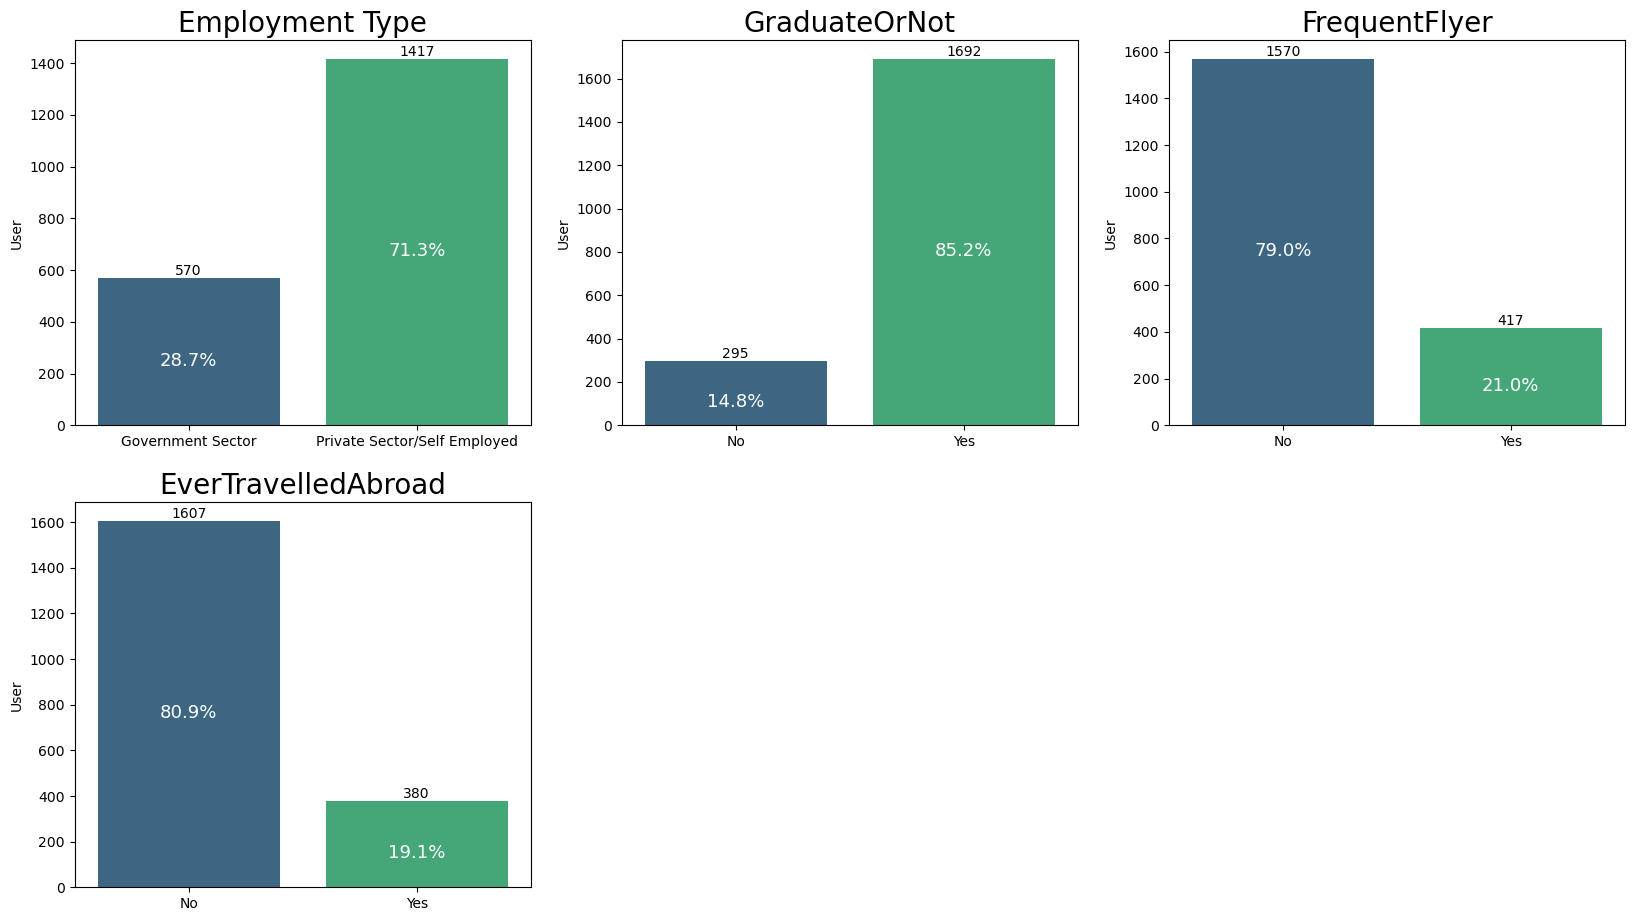

In [8]:
#Categorical-Univariate Analysis

plt.figure(figsize=(20, 11))
for x in range(0, len(cat)):

  dfg = df.groupby([cat[x]])['Age'].count().reset_index(name = 'User')
  dfg['ratio'] = dfg['User'] / df['Age'].count()
  dfg
  
  plt.subplot(2, 3, x+1)
  for i, bar in enumerate(sns.barplot(x=cat[x], y='User',palette='viridis', data=dfg).containers):
    for j, value in enumerate(bar):
      number = value.get_height()
      percent = (dfg['ratio'].where(dfg['User'] == value.get_height()).sum())*100
      plt.text(value.get_x() + value.get_width() / 2, value.get_height(), round(number), ha='center', va='bottom', fontsize=10)
      plt.text(value.get_x() + value.get_width() / 2, value.get_height()/2, f"{percent:.1f}%", ha='center', va='top', fontsize=13, color='white')
      plt.xlabel('')
      plt.title(cat[x],fontsize=20)
plt.show()

In [9]:
df[cat].describe().T

,count,unique,top,freq
Employment Type,1987,2,Private Sector/Self Employed,1417
GraduateOrNot,1987,2,Yes,1692
FrequentFlyer,1987,2,No,1570
EverTravelledAbroad,1987,2,No,1607


ValueError: num must be 1 <= num <= 3, not 4

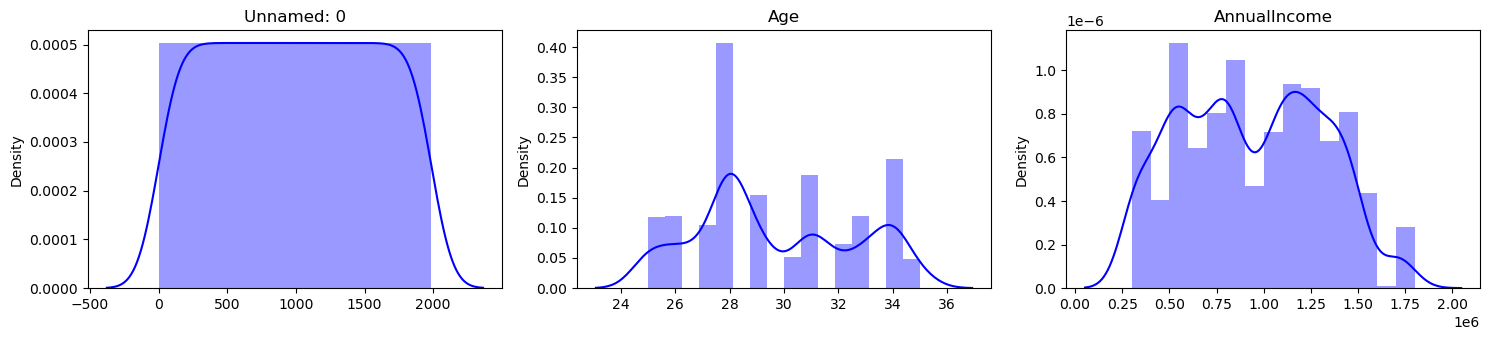

In [10]:
#Numerical-Univariate Analysis

plt.figure(figsize=(15, 3.5))
for x in range(0, len(num)):
  plt.subplot(1, 3, x+1)
  sns.distplot(df[num[x]], color='b')
  plt.title(num[x], fontsize=12)
  plt.xlabel('')
  plt.tight_layout()

ValueError: num must be 1 <= num <= 3, not 4

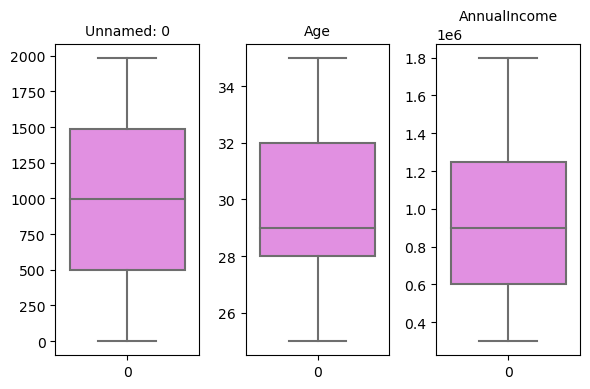

In [ ]:
#Outlier Check

plt.figure(figsize=(6,4))
for x in range(0, len(num)):
  plt.subplot(1, 3, x+1)
  sns.boxplot(df[num[x]], color='violet')
  plt.title(num[x], fontsize = 10)
  plt.tight_layout()

In [ ]:
df[num].describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,1987.0,993.000000,573.741812,0.0,496.5,993.0,1489.5,1986.0
Age,1987.0,29.650226,2.913308,25.0,28.0,29.0,32.0,35.0
AnnualIncome,1987.0,932762.959235,376855.684748,300000.0,600000.0,900000.0,1250000.0,1800000.0
FamilyMembers,1987.0,4.752894,1.609650,2.0,4.0,5.0,6.0,9.0


##Bivariate Analysis

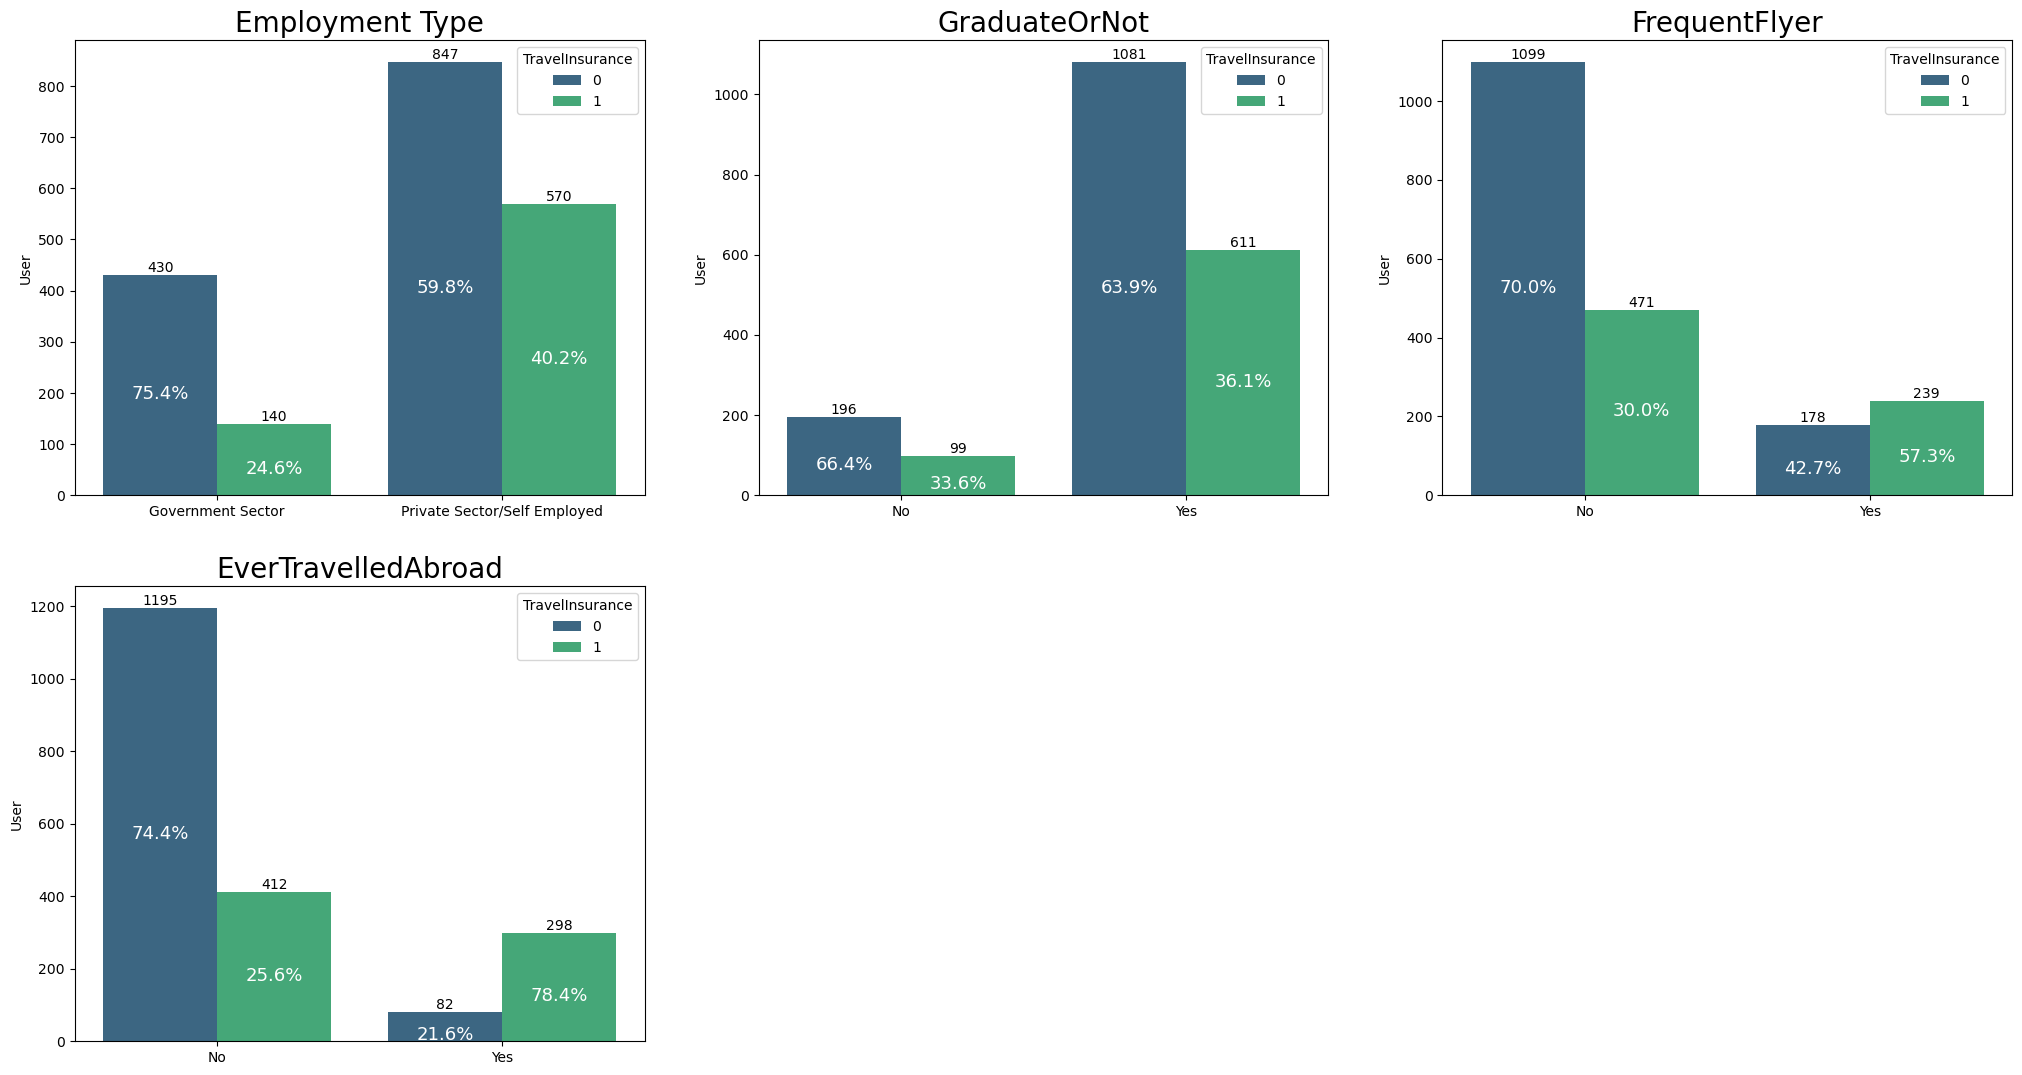

In [11]:
#Categorical-Bivariate Analysis

plt.figure(figsize=(25, 13))
for x in range(0, len(cat)):
  if cat[x] != 'TravelInsurance':
    dfg = df.groupby([cat[x],'TravelInsurance'])['Age'].count().reset_index(name='User')
    dfg_tot = df.groupby([cat[x]])['Age'].count().reset_index(name = 'Total')
    dfg = dfg.merge(dfg_tot, how = 'inner', on = cat[x])
    dfg['ratio'] = dfg['User'] / dfg['Total']
    dfg
  
    plt.subplot(2, 3, x+1)
    for i, bar in enumerate(sns.barplot(x=cat[x], y='User', hue='TravelInsurance',palette='viridis', data=dfg).containers):
      for j, value in enumerate(bar):
        number = value.get_height()
        percent = (dfg['ratio'].where(dfg['User'] == value.get_height()).sum())*100
        plt.text(value.get_x() + value.get_width() / 2, value.get_height(), round(number), ha='center', va='bottom', fontsize=10)
        plt.text(value.get_x() + value.get_width() / 2, value.get_height()/2, f"{percent:.1f}%", ha='center', va='top', fontsize=13, color='white')
        plt.xlabel('')
        plt.title(cat[x],fontsize=20)
plt.show()

ValueError: num must be 1 <= num <= 3, not 4

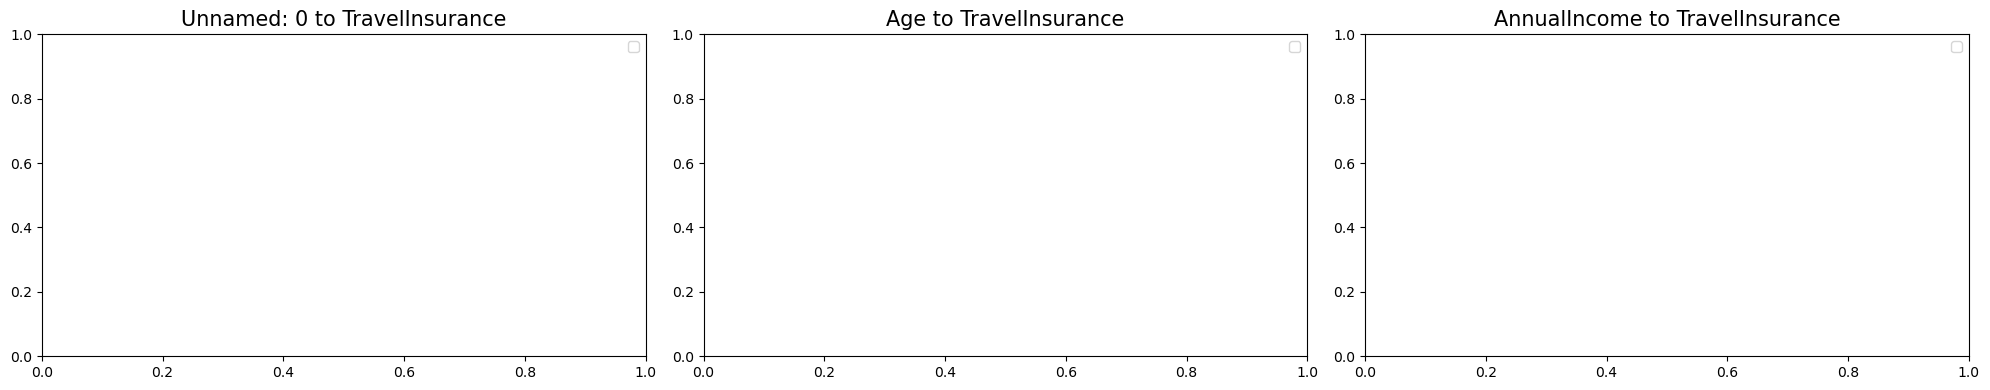

In [12]:
#Numerical-Bivariate Analysis

plt.figure(figsize=(20, 4))
for x in range(0, len(num)):
    plt.subplot(1, 3, x+1)
    ax = sns.kdeplot(df[num[x]][(df["TravelInsurance"] == 'not purchased') ],
                color="violet", shade = True)
    ax = sns.kdeplot(df[num[x]][(df["TravelInsurance"] == 'purchased') ],
                ax =ax, color="lightblue", shade= True)
    ax.legend(["not purchased","purchased"],loc='upper right')
    plt.title(f'{num[x]} to TravelInsurance', fontsize = 15)
    plt.tight_layout()

##Multivariate

In [13]:
from scipy.stats import chi2_contingency

In [14]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# Example usage
#df = pd.read_csv("your_file.csv")
#corr = cramers_v(df["column1"], df["column2"])
#sns.heatmap([[1, corr], [corr, 1]], annot=True)

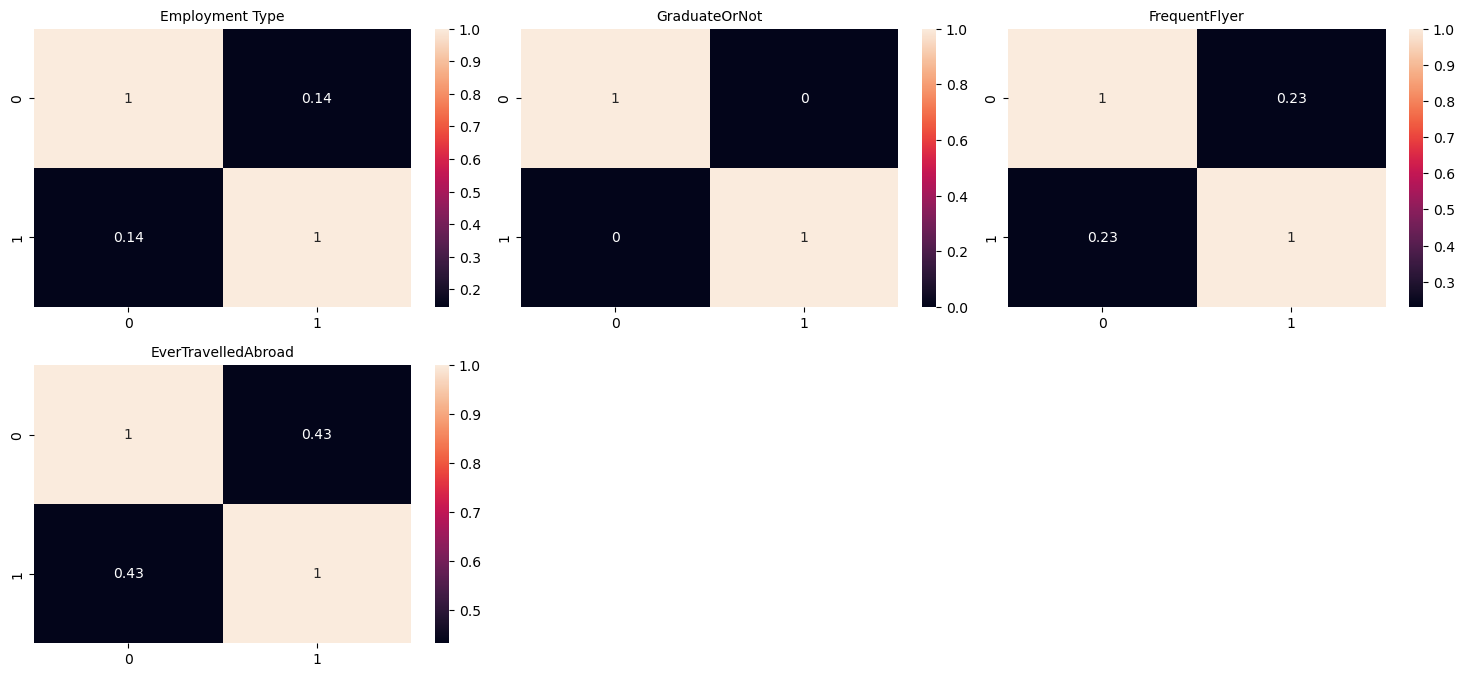

In [15]:
plt.figure(figsize=(15,10))
for x in range(0, len(cat)):
  plt.subplot(3, 3, x+1)
  corr = cramers_v(df[cat[x]], df["TravelInsurance"])
  sns.heatmap([[1, corr], [corr, 1]], annot=True)
  plt.title(cat[x], fontsize = 10)
  plt.tight_layout()

### 3. Data Pre-Processing

#### Data Cleansing

##### Missing, Duplicated and Outliers 

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           1987 non-null   int64 
 1   Age                  1987 non-null   int64 
 2   Employment Type      1987 non-null   object
 3   GraduateOrNot        1987 non-null   object
 4   AnnualIncome         1987 non-null   int64 
 5   FamilyMembers        1987 non-null   int64 
 6   ChronicDiseases      1987 non-null   int64 
 7   FrequentFlyer        1987 non-null   object
 8   EverTravelledAbroad  1987 non-null   object
 9   TravelInsurance      1987 non-null   int64 
dtypes: int64(6), object(4)
memory usage: 155.4+ KB


In [17]:
df.duplicated().sum()

0

##### Feature Transformation and Encoding

In [24]:
df['Employment Type']=df['Employment Type'].map({'Private Sector/Self Employed':1,'Government Sector':0})
df['GraduateOrNot']=df['GraduateOrNot'].map({'Yes':1,'No':0})
df['FrequentFlyer']=df['FrequentFlyer'].map({'No':0,'Yes':1})
df['EverTravelledAbroad']=df['EverTravelledAbroad'].map({'No':0,'Yes':1})
df.head()

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,0,1,400000,6,1,0,0,0
1,1,31,1,1,1250000,7,0,0,0,0
2,2,34,1,1,500000,4,1,0,0,1
3,3,28,1,1,700000,3,1,0,0,0
4,4,28,1,1,700000,8,1,1,0,0


In [25]:
from sklearn.preprocessing import MinMaxScaler

df['AnnualIncome'] = MinMaxScaler().fit_transform(df['AnnualIncome'].values.reshape(len(df),1))
df['Age'] = MinMaxScaler().fit_transform(df['Age'].values.reshape(len(df),1))
df['FamilyMembers'] = MinMaxScaler().fit_transform(df['FamilyMembers'].values.reshape(len(df),1))

df.head()

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,0.6,0,1,0.066667,0.571429,1,0,0,0
1,1,0.6,1,1,0.633333,0.714286,0,0,0,0
2,2,0.9,1,1,0.133333,0.285714,1,0,0,1
3,3,0.3,1,1,0.266667,0.142857,1,0,0,0
4,4,0.3,1,1,0.266667,0.857143,1,1,0,0


##### Handling Imbalanced

In [26]:
#Train Test Split

X = df.drop(['TravelInsurance'], axis=1)
y = df['TravelInsurance']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 69)

In [27]:
#handling imbalance data
from imblearn import over_sampling

X_over_SMOTE, y_over_SMOTE = over_sampling.SMOTE().fit_resample(X_train, y_train)

In [28]:
print('Target(y_train) values :\n0 = not purcashed\n1 = purcashed\n')
print(f'Target before SMOTE:\n{pd.Series(y_train).value_counts()}\n\nTarget after SMOTE:\n{pd.Series(y_over_SMOTE).value_counts()}\n')
print('*'*17,'♥','*'*17)
print('X_train :')
print(f'\nBefore SMOTE:{X_train.shape}\nAfter  SMOTE:{X_over_SMOTE.shape}')


Target(y_train) values :
0 = not purcashed
1 = purcashed

Target before SMOTE:
0    904
1    486
Name: TravelInsurance, dtype: int64

Target after SMOTE:
0    904
1    904
Name: TravelInsurance, dtype: int64

***************** ♥ *****************
X_train :

Before SMOTE:(1390, 9)
After  SMOTE:(1808, 9)


#### Feature Engineering

In [ ]:
df.drop(columns=["Unnamed: 0"], inplace=True)